In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [75]:
df = pd.read_csv('./data/train_set.csv', index_col=0)

genes_to_predict = list(df.index)
pairs_to_predict = list(pd.read_csv('./data/test_set.csv', header=None)[0])

print('Number of genes to predict = ' + str(len(genes_to_predict)))
print('Number of pairs to predict = ' + str(len(pairs_to_predict)))

Number of genes to predict = 1000
Number of pairs to predict = 50


In [87]:
s_per = [x for x in df.columns if '+ctrl' in x]
s_per = [x[:5] for x in s_per]
s_per = list(set(s_per))
s_per.sort()
print('Number of unique single perturbations in data set = ' + str(len(s_per)))

d_per = [x for x in df.columns if (('+' in x)&('ctrl' not in x))]
d_per = [x[:11] for x in d_per]
d_per = list(set(d_per))
d_per.sort()
print('Number of unique double perturbations in data set = ' + str(len(d_per)))

Number of unique single perturbations in data set = 101
Number of unique double perturbations in data set = 75


In [88]:
d_per

['g0013+g0139',
 'g0013+g0495',
 'g0022+g0228',
 'g0022+g0784',
 'g0037+g0186',
 'g0083+g0599',
 'g0083+g0633',
 'g0109+g0655',
 'g0109+g0787',
 'g0147+g0160',
 'g0147+g0241',
 'g0160+g0241',
 'g0160+g0495',
 'g0186+g0216',
 'g0186+g0228',
 'g0186+g0868',
 'g0200+g0605',
 'g0228+g0780',
 'g0228+g0827',
 'g0261+g0013',
 'g0261+g0160',
 'g0261+g0186',
 'g0261+g0760',
 'g0301+g0139',
 'g0301+g0612',
 'g0301+g0744',
 'g0301+g0751',
 'g0317+g0655',
 'g0345+g0552',
 'g0422+g0013',
 'g0422+g0139',
 'g0422+g0301',
 'g0422+g0612',
 'g0422+g0751',
 'g0520+g0257',
 'g0534+g0228',
 'g0534+g0612',
 'g0671+g0784',
 'g0681+g0160',
 'g0681+g0301',
 'g0681+g0751',
 'g0691+g0404',
 'g0691+g0631',
 'g0697+g0062',
 'g0698+g0062',
 'g0698+g0207',
 'g0698+g0697',
 'g0707+g0157',
 'g0761+g0157',
 'g0761+g0707',
 'g0773+g0241',
 'g0773+g0261',
 'g0773+g0379',
 'g0780+g0744',
 'g0787+g0317',
 'g0787+g0655',
 'g0787+g0965',
 'g0805+g0013',
 'g0805+g0062',
 'g0805+g0780',
 'g0844+g0957',
 'g0852+g0034',
 'g0852+

In [77]:
for g in genes_to_predict:
    s_cols = [x for x in df.columns if f'{g}' in x]

In [78]:
g = genes_to_predict[0]
s_cols = [x for x in df.columns if f'{g}' in x]
s_cols

[]

In [79]:
df.columns

Index(['g0495+ctrl', 'g0261+g0760', 'g0232+ctrl', 'g0083+g0599', 'g0461+ctrl',
       'g0160+g0495', 'g0276+ctrl', 'g0147+g0241', 'g0200+g0605',
       'g0761+g0157',
       ...
       'g0261+g0013.39', 'g0186+g0868.39', 'g0228+g0780.39', 'g0186+g0216.39',
       'g0520+ctrl.39', 'g0927+g0852.39', 'g0671+ctrl.39', 'g0301+g0139.39',
       'g0843+ctrl.39', 'g0061+ctrl.39'],
      dtype='object', length=7080)

In [81]:
'g0095+g0257'

for x in df.columns:
    if ('g0095' in x) | ('g0257' in x):
        print(x)

g0520+g0257
g0520+g0257.1
g0520+g0257.2
g0520+g0257.3
g0257+ctrl
g0095+ctrl
g0257+ctrl.1
g0257+ctrl.2
g0257+ctrl.3
g0520+g0257.4
g0257+ctrl.4
g0257+ctrl.5
g0520+g0257.5
g0095+ctrl.1
g0095+ctrl.2
g0095+ctrl.3
g0257+ctrl.6
g0257+ctrl.7
g0520+g0257.6
g0257+ctrl.8
g0520+g0257.7
g0095+ctrl.4
g0095+ctrl.5
g0257+ctrl.9
g0095+ctrl.6
g0095+ctrl.7
g0520+g0257.8
g0520+g0257.9
g0095+ctrl.8
g0520+g0257.10
g0095+ctrl.9
g0257+ctrl.10
g0257+ctrl.11
g0257+ctrl.12
g0095+ctrl.10
g0095+ctrl.11
g0257+ctrl.13
g0520+g0257.11
g0095+ctrl.12
g0520+g0257.12
g0257+ctrl.14
g0520+g0257.13
g0095+ctrl.13
g0257+ctrl.15
g0520+g0257.14
g0095+ctrl.14
g0257+ctrl.16
g0095+ctrl.15
g0520+g0257.15
g0257+ctrl.17
g0520+g0257.16
g0095+ctrl.16
g0257+ctrl.18
g0520+g0257.17
g0095+ctrl.17
g0095+ctrl.18
g0520+g0257.18
g0095+ctrl.19
g0257+ctrl.19
g0520+g0257.19
g0257+ctrl.20
g0095+ctrl.20
g0095+ctrl.21
g0095+ctrl.22
g0257+ctrl.21
g0520+g0257.20
g0257+ctrl.22
g0095+ctrl.23
g0520+g0257.21
g0095+ctrl.24
g0257+ctrl.23
g0257+ctrl.24
g0520+

In [82]:
g1 = 'g0095'
g2 = 'g0257'

ctrl1 = df.loc[g1][ [x for x in df.columns if ((f'ctrl' in x)&(g1 not in x))] ]
ctrl2 = df.loc[g2][ [x for x in df.columns if ((f'ctrl' in x)&(g2 not in x))] ]
pert1 = df.loc[g1][ [x for x in df.columns if (f'{g1}+ctrl' in x)] ]
pert2 = df.loc[g2][ [x for x in df.columns if (f'{g2}+ctrl' in x)] ]

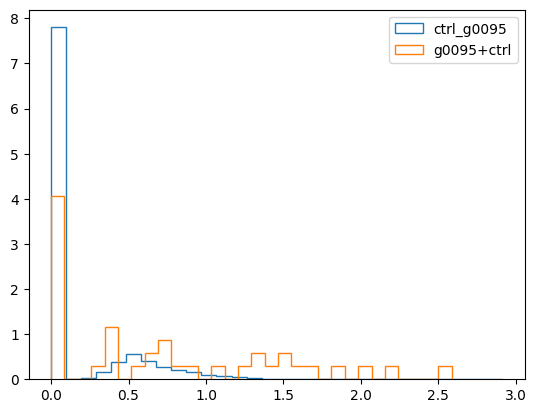

In [83]:
nbins = 30
plt.hist(ctrl1, density=True, bins=nbins, histtype='step', label=f'ctrl_{g1}')
# plt.hist(ctrl2, density=True, bins=nbins, histtype='step', label=f'ctrl_{g2}')
plt.hist(pert1, density=True, bins=nbins, histtype='step', label=f'{g1}+ctrl')
# plt.hist(pert2, density=True, bins=nbins, histtype='step', label=f'{g2}+ctrl')
plt.legend();

In [107]:
preds = pd.DataFrame(columns=['gene', 'perturbation', 'expression'], index=range(50_000))

j = 0
for i in tqdm(range(len(genes_to_predict))):
# for i in tqdm(range(1)):
    gene = genes_to_predict[i]
    for pair in pairs_to_predict:
    # for k in range(1):
    #     pair = pairs_to_predict[0]
        g1 = pair.split('+')[0]
        g2 = pair.split('+')[1]
        # add control columns
        cols_to_average = [x for x in df.columns if (('ctrl' in x)&(len(x)<=7))]

        # add columns if either gene in the perturbation was part of a previous double perturbation
        for double in d_per:
            if ((g1 in double) | (g2 in double)):
                cols_to_add = [x for x in df.columns if double in x]
                cols_to_average.extend(cols_to_add)
        
        # add columns if either gene in the perturbation was previously sinlgy perturbed
        for single in s_per:
            if ((g1 in single) | (g2 in single)):
                cols_to_add = [x for x in df.columns if (((single+'+') in x)|(('+'+single) in x))]
                cols_to_average.extend(cols_to_add)
        temp = df.loc[gene]
        temp = temp[cols_to_average]
        expression = np.mean(temp)
        preds.iloc[j] = [gene, pair, expression]
        j += 1
preds        

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:18<00:00,  1.79it/s]


,gene,perturbation,expression
0,g0001,g0037+g0083,0.36619
1,g0001,g0083+g0605,0.38051
2,g0001,g0095+g0257,0.234398
3,g0001,g0095+g0520,0.21667
4,g0001,g0109+g0317,0.31663
...,...,...,...
49995,g1000,g0924+g0852,0.935889
49996,g1000,g0927+g0186,1.1313
49997,g1000,g0957+g0186,1.109239
49998,g1000,g0957+g0261,0.971783


In [118]:
preds = preds.sort_values(['perturbation','gene'])
preds.to_csv('./prediction/prediction.csv', index=False)

In [122]:
# Test that I have the right order
template = pd.read_csv('./prediction/prediction-template.csv')
template = template[['gene', 'perturbation']]
submission = preds[['gene', 'perturbation']]

In [124]:
submission

,gene,perturbation
0,g0001,g0037+g0083
50,g0002,g0037+g0083
100,g0003,g0037+g0083
150,g0004,g0037+g0083
200,g0005,g0037+g0083
...,...,...
49799,g0996,g0965+g0417
49849,g0997,g0965+g0417
49899,g0998,g0965+g0417
49949,g0999,g0965+g0417
